## Opening the black box

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

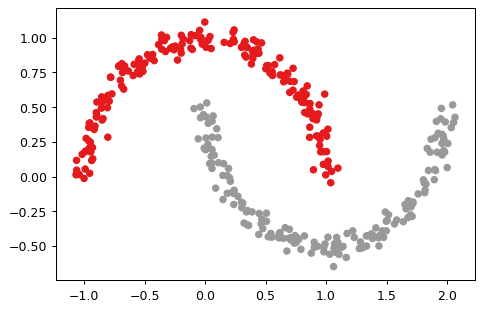

In [2]:
np.random.seed(0)
coord, cl = make_moons(500, noise=0.05)
X, Xt, y, yt = train_test_split(coord, cl,
                                test_size=0.30,
                                random_state=0)

cmap_set1 = plt.cm.Set1
fig, ax = plt.subplots(dpi=90)
ax.scatter(X[:,0], X[:,1], s=25, c=y, cmap=cmap_set1)
plt.show()

In [3]:
import tensorflow.keras as keras

model = keras.models.Sequential()
model.add(keras.layers.Input(2,))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X, y, epochs=1000, batch_size=64, shuffle=True, verbose=0)

In [5]:
from sklearn.metrics import accuracy_score
predictions = (model.predict(Xt)>=0.5).astype(int)
test_accuracy = accuracy_score(yt, predictions)
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on test set: 1.0


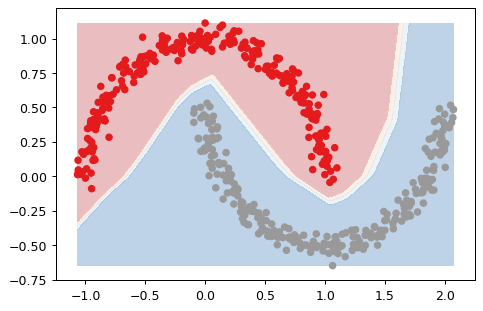

In [6]:
steps = 100
x_min, x_max = coord[:,0].min(), coord[:,0].max()
y_min, y_max = coord[:,1].min(), coord[:,1].max()

x_range = np.linspace(x_min, x_max, steps)
y_range = np.linspace(y_min, y_max, steps)

xx, yy = np.meshgrid(x_range, y_range)
xy = np.stack([np.ravel(xx), np.ravel(yy)], axis=1)
zz = model.predict(xy).reshape(xx.shape)

cmap_rb = plt.get_cmap('RdBu')
fig, ax = plt.subplots(dpi=90)
ax.contourf(xx, yy, zz, cmap=cmap_rb, alpha=0.3, levels=3)
ax.scatter(coord[:,0], coord[:,1], s=25, c=cl, cmap=cmap_set1)
plt.show()

## Explaining the magic of convolutions

In [7]:
import tensorflow.keras as keras

loader = keras.datasets.fashion_mnist.load_data
(x_train, y_train), (x_test, y_test) = loader()

<Figure size 432x288 with 0 Axes>

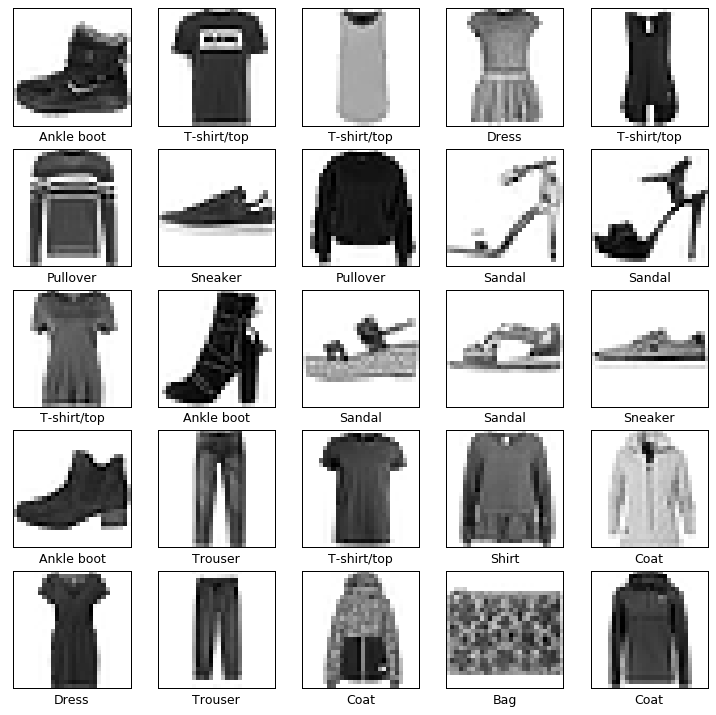

In [8]:
import matplotlib.pyplot as plt

class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}

plt.figure()
fig, ax = plt.subplots(5, 5, figsize=(10, 10), dpi=90)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [9]:
num_classes = 10
x_train = (x_train / 255.).reshape(-1, 28, 28, 1)
x_test = (x_test / 255.).reshape(-1, 28, 28, 1)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, 
                              kernel_size=(3, 3),
                              activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                294944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [11]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=11,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy on test set: {score[1]:0.3}')

Train on 48000 samples, validate on 12000 samples
Epoch 1/11
48000/48000 [==============================] - 282s 6ms/sample - loss: 0.5318 - acc: 0.8133 - val_loss: 0.3421 - val_acc: 0.8755
Epoch 2/11
48000/48000 [==============================] - 305s 6ms/sample - loss: 0.3490 - acc: 0.8768 - val_loss: 0.2799 - val_acc: 0.8988
Epoch 3/11
48000/48000 [==============================] - 306s 6ms/sample - loss: 0.2936 - acc: 0.8936 - val_loss: 0.2609 - val_acc: 0.9052
Epoch 4/11
48000/48000 [==============================] - 300s 6ms/sample - loss: 0.2610 - acc: 0.9061 - val_loss: 0.2500 - val_acc: 0.9091
Epoch 5/11
48000/48000 [==============================] - 307s 6ms/sample - loss: 0.2325 - acc: 0.9156 - val_loss: 0.2322 - val_acc: 0.9175
Epoch 6/11
48000/48000 [==============================] - 307s 6ms/sample - loss: 0.2073 - acc: 0.9243 - val_loss: 0.2355 - val_acc: 0.9149
Epoch 7/11
48000/48000 [==============================] - 337s 7ms/sample - loss: 0.1859 - acc: 0.9317 - val_l

## Understanding recurrent neural networks

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
filename = 'https://github.com/lmassaron/datasets/'
filename += 'releases/download/1.0/air_passengers.feather'
passengers = pd.read_feather(filename).set_index('Month')

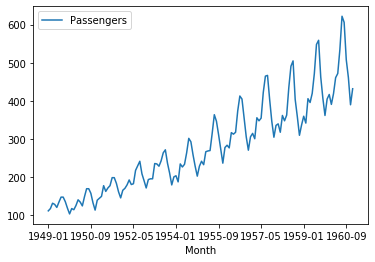

In [14]:
passengers.plot()
plt.show()

In [15]:
lookback = 12
sequence = pd.DataFrame(
   {'shift_'+str(s): passengers['Passengers'].shift(s) 
    for s in range(lookback+1)})[lookback:]

In [16]:
sequence.head(5)

,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Month,,,,,,,,,,,,,
1950-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0


In [17]:
y = sequence.iloc[:, 0]
X = sequence.iloc[:, 1:]

In [18]:
max_value = np.max(y)
y /= max_value
X /= max_value

In [19]:
shape = list(X.shape)
shape.insert(1, 1)
print(shape)

X = X.values.reshape(shape)

[132, 1, 12]


In [20]:
y_train = y[:-24]
y_test = y[-24:]

X_train = X[:-24]
X_test = X[-24:]

In [74]:
import tensorflow.keras as keras

model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=4, 
              input_shape=(1, lookback)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4)                 272       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 5         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train, y_train, 
          epochs=300, 
          batch_size=8,
          shuffle=True,
          verbose=0)

In [76]:
preds = model.predict(X_test) * max_value
real = y_test * max_value

In [77]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true=real, y_pred=preds))
print(f"RMSE for test set: {rmse:0.3}")

RMSE for test set: 38.1


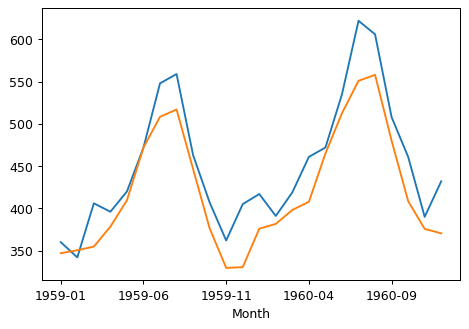

In [78]:
fig, ax = plt.subplots(dpi=90)
real.plot()
ax.plot(preds)
plt.show()